Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mean Squared Error: 1.1050437673821768e-05


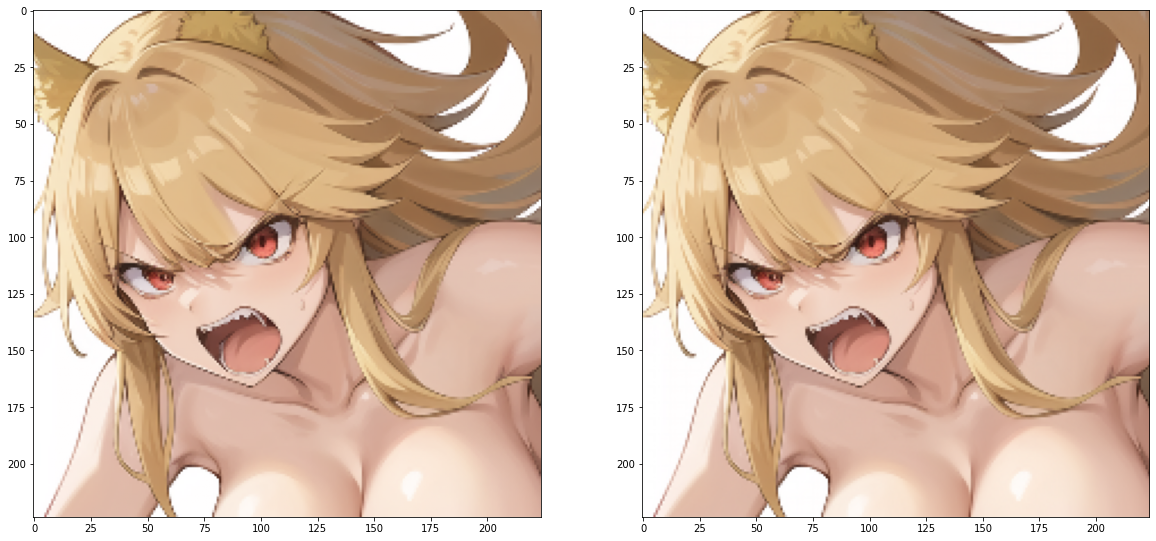

In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def image_resize_cv(image_path, target_size):
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Get the original image dimensions
        original_height, original_width, _ = image.shape

        # Calculate the aspect ratio
        aspect_ratio = original_width / original_height

        # Calculate the new dimensions while maintaining the aspect ratio
        target_width, target_height = target_size
        
        if aspect_ratio == 1:
            # Perfect square shape
            new_width = min(target_size)
            new_height = min(target_size)   
        elif aspect_ratio > 1:
            # Landscape orientation (wider than tall)
            new_width = target_width
            new_height = int(new_width / aspect_ratio)
        else:
            # Portrait or square orientation (taller than wide)
            new_height = target_height
            new_width = int(new_height * aspect_ratio)
        
        # Resize the image using interpolation
        image = cv2.resize(image, (new_width, new_height), interpolation = cv2.INTER_CUBIC)
        
        # Convert pixel values from int to float by dividing by 255.0
        image = image / 255.0
        return image
    
def image_resize_tf(image_path, target_size):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, expand_animations=False)
    image = tf.image.resize(image, target_size,
                            preserve_aspect_ratio=True,
                            method="bicubic",
                            antialias=False)
    image = image / 255.0
    return image.numpy()

image_dir = "D:\\Github Public\\DATASET MANAGER\\ObjectDetection_SIMPLE\\1065306689.png"

w = 224
h = 224

opencv = image_resize_cv(image_dir, (w,h))
tensor = image_resize_tf(image_dir, (w,h))

mse = np.mean((opencv - tensor) ** 2)
print("Mean Squared Error:", mse)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(opencv)
plt.subplot(1,2,2)
plt.imshow(tensor)